
<a id='chap-tpkmeans'></a>

# K-means

The **objective** of this assignment is to present the use of scikit-learn functionalities concerning automatic classification with k-means, as well as to contribute to a better understanding of this method and the impact on the results of the data distribution or initialization technique (random initialization or k-means++). For this, data generated in a controlled manner are first examined and then real data seen in progress, with or without pre-processing to reinforce the separation between groups.

### Update log
- Nov.13 Yao: Add some annotations mostly from API. '|=' means base on the relevant API and '|->' means base on the 
excution.
- Nov.13 Yao: Add code from from assignment question 4
- Nov.13 Aaron : uploaded .dat file (used in final cell)
- Nov.15 Yao :  upload the Q1, Q2, Q3 code and plots
- Nov.18 Yao: update the notation of Q1,Q2,Q3 for easy understand the code
- Nov.18 Yao: Upload the code of Q4, not sure about the answer : because we have unlabel data, so we run kmeans at the begining to create a ference group, I don't know if this logic is right
-Nov.18 Yao: Upload the code of Q5, still don't know how to upload the 'texture.dat' file in google colab. After upload the file, error will not appear. Not sure about the answer : because after reduce the dimension, we still have 10D, as Ayoub said, I just plot the first 3 features as space position.
-Nov.21 Chen: Update the code of Q1 to Q5, optimize the processing and output.

In [2]:
import numpy as np    
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [3]:
# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
# |= np.random.randn : Return a random sample (or samples) from the "standard normal" distribution.
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# generation of labels for each group
# |= np.ones: Return a new array of given shape and type, filled with ones.
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concatenation of data in a matrix
# |= np.concatenate: Join a sequence of arrays along an existing axis.
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# random permutation of the rows of the data matrix
# |= shuffle: Shuffle arrays or sparse matrices in a consistent way. It means always give the same ouput with the same input
data, labels = shuffle(data, labels)

(500, 3)


Visualize the starting groups:

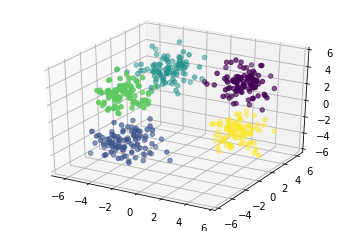

In [4]:
fig = plt.figure()
# |= 111: 1 row 1 column first index; projection 3d: means it will be a 3D plot
ax = fig.add_subplot(111, projection='3d')
# The color of the points depends on their label
# |= mplot3d.axes3d.Axes3D.scatter: (x,y,z, color = labels)
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

In [5]:
#helper function that wraps figure plotting code
def visualize_classification_3d(data, labels):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')  
  ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
  plt.show()

Apply automatic classification with K-means, first with a single trial (a single initialization followed by a single execution of *K-means*, n_init=1) using the k-means++ initialization method:

In [6]:
from sklearn.cluster import KMeans
# |= Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters.
# |= KMeans: n_clusters: The number of clusters to form as well as the number of centroids to generate.
# |=         n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
# |=         init: Has 'K-means++' and 'random'; K: selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. R:choose n_clusters observations (rows) at random from data for the initial centroids.
# |=         fit(): Training instance 'data' to clusters
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

Review the parameters, attributes, and methods of the sklearn.cluster.KMeans class by following the link given above. The predicted groups for the data can be obtained using the predict(X) method:

In [7]:
# |= predict(): Predict the closest cluster each sample in 'data' belongs to.
# |= returen: Index of the cluster each sample belongs to.
pred = kmeans.predict(data)
# |-> print(pred) the output is equal to the next cell print(kmeans.labels_)

Groups associated with training examples are also stored in the kmeans.labels_ attribute:

In [8]:
# |= kmeans attribute: labels of each point
print(kmeans.labels_)

[0 3 1 1 0 0 1 1 0 2 3 1 3 4 3 0 3 1 0 3 4 4 2 0 0 2 0 3 1 3 0 3 4 4 3 1 3
 1 1 1 3 4 4 4 2 0 3 1 0 0 1 2 2 3 2 0 3 2 4 2 2 1 4 0 0 0 2 0 2 2 4 1 0 4
 4 4 3 2 2 4 1 1 4 0 2 2 1 2 3 2 2 1 0 0 2 1 4 4 2 1 2 1 0 3 3 3 2 1 0 4 1
 1 4 4 0 0 4 1 2 1 2 0 1 0 3 2 3 0 4 4 2 2 0 1 1 0 4 4 4 3 4 2 2 0 1 4 2 0
 4 2 3 2 0 3 3 3 3 1 4 4 0 2 2 4 3 3 1 2 0 1 3 1 4 3 1 1 2 2 0 4 4 0 0 4 1
 4 3 0 1 2 4 4 3 0 4 3 3 3 0 1 1 3 4 3 0 1 0 1 1 3 4 3 2 2 0 3 3 0 0 1 4 0
 2 4 1 3 4 0 2 0 2 2 3 0 3 3 3 3 4 0 2 4 4 1 3 0 2 3 3 3 4 1 0 1 4 0 2 4 4
 1 4 4 1 0 3 2 4 2 4 2 0 4 1 0 1 1 2 1 2 2 3 2 2 3 0 2 1 0 0 2 1 2 1 1 4 0
 3 0 0 0 0 3 3 0 0 0 2 4 0 1 1 1 3 1 0 4 3 3 1 1 1 1 0 1 2 0 3 3 1 3 1 0 3
 1 2 4 2 2 1 4 1 2 1 3 3 3 0 0 0 0 4 2 3 4 2 3 0 0 3 4 0 2 1 0 1 3 3 2 4 3
 2 1 1 2 3 0 4 0 2 0 4 2 1 3 3 3 4 1 3 3 0 1 4 1 3 3 4 4 3 4 4 4 2 4 4 2 4
 3 2 0 4 1 1 2 1 4 4 4 4 3 2 4 2 0 4 4 1 4 2 0 0 4 2 3 1 3 2 2 2 1 2 1 3 4
 2 2 2 2 2 0 3 1 2 1 0 1 0 1 4 3 3 3 4 1 2 2 3 3 1 4 3 0 1 2 1 3 4 2 2 2 0
 1 4 2 4 4 4 0 0 3 4 2 0 

Visualize the results of this classification:

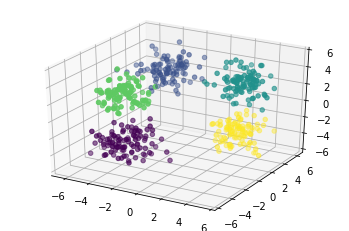

In [9]:
visualize_classification_3d(data, pred)

It is possible to assess the consistency between the starting groups and the partitioning found by K-means using the adjusted Rand index:

In [10]:
from sklearn import metrics
# |= The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
# |= The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).
# |= Measure similarity, close to 0 is bad and 1 is identical, ignoring permutations. Not ensure get 0 when obtain random labelling
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

1.0

The call to metrics.adjusted_rand_score() compares the partitioning obtained by the automatic classification (pred group labels) with the partitioning corresponding to the groups defined at the start (labels stored in labels).

Now apply automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:


In [11]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)
# |-> Need to excute the cell several times
# |-> Because the initial centroid point is random and K-means is sensitive to inital centroid points

1.0

### Question 1:
Repeat the classification several times with each of these two initialization methods and each time examine the consistency of the groups obtained with the starting groups. What do you notice? Explain.


In [51]:
# import plotly to create interactive plot
# define a functions to repeat the Kmeans with 'k-means++' and 'random' N times and compare
def compare_kmeans_random(N):
    # create 2 empty list to store the scores from 2 different method
    scores1 = []
    scores2 = []

    #for time 0, set score to 0
    scores1.append(0)
    scores2.append(0)

    # for loop N times
    for i in range(1,N):
        # kmeans score
        kmeans1 = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)
        scores1.append(metrics.adjusted_rand_score(kmeans1.labels_, labels))
        # random score
        kmeans2 = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
        scores2.append(metrics.adjusted_rand_score(kmeans2.labels_, labels))
    
    # plot two line in one chart, easy to compare
    fig = go.Figure()    
    fig.layout.xaxis.range = [1, N]
    fig.layout.yaxis.range = [0, 1.1]  

    fig.add_trace(go.Scatter(y=scores1, name='k-means++', mode='lines+markers'))
    fig.add_trace(go.Scatter(y=scores2, name='random', mode='lines+markers'))

    fig.update_layout(autosize=False, width=1000, height=500,
                      title="Adjusted Rand Score of K-Means cluster with different Initialization methods", 
                      xaxis_title="Repeat times", yaxis_title="Adjusted_rand_score",legend_title="Init_method:")                     

    fig.show()
    # print two average scores
    print("Average k-means++ score: " + str(np.mean(scores1[1:])))
    print("Average random score   : " + str(np.mean(scores2[1:])))

    print("Variance of k-means++ score: " + str(np.var(scores1[1:])))
    print("Variance of random score   : " + str(np.var(scores2[1:])))


In [13]:
# call the compare_kmeans_rondom()
compare_kmeans_random(100)

Average k-means++ score: 0.9941465800574648
Average random score   : 0.8689929302323085
Variance of k-means++ score: 0.001663054912590679
Variance of random score   : 0.021532243191541078


### Question 2:
Vary the number of clusters (n_clusters) and experiment for each value
of the number of clusters. Re-examine the stability of the results using the adjusted Rand
index. Explain what you see.

In [15]:
min_n_clusters = 2
max_n_clusters = 60

score_kmeans = []
score_random = []

var_kmeans = []
var_random = []

for i in range(min_n_clusters):
  score_kmeans.append(0)
  score_random.append(0)
  var_kmeans.append(0)
  var_random.append(0)

for n in range(min_n_clusters, max_n_clusters):
  score_kmeans_n = []
  score_random_n = []
  #Repeat to calculate the mean score for each n_cluster
  for i in range(30):
    kmeans1 = KMeans(n_clusters=n, n_init=1, init='k-means++').fit(data)  
    score_kmeans_n.append(metrics.adjusted_rand_score(kmeans1.labels_, labels))

    kmeans2 = KMeans(n_clusters=n, n_init=1, init='random').fit(data)  
    score_random_n.append(metrics.adjusted_rand_score(kmeans2.labels_, labels))

  score_kmeans.append(np.mean(score_kmeans_n[min_n_clusters:]))
  score_random.append(np.mean(score_random_n[min_n_clusters:]))

  var_kmeans.append(np.var(score_kmeans_n[min_n_clusters:]))
  var_random.append(np.var(score_random_n[min_n_clusters:]))


In [19]:
# plot two lines
fig = go.Figure()
fig.layout.xaxis.range = [2, max_n_clusters]
fig.layout.yaxis.range = [0, 1.1]  

fig.add_trace(go.Scatter(y=score_kmeans, name='k-means++', mode='lines+markers'))
fig.add_trace(go.Scatter(y=score_random, name='random', mode='lines+markers'))

fig.update_layout(autosize=False, width=1000, height=500,
                  title="Adjusted Rand score of K-Means cluster with different Number of Clusters", 
                  xaxis_title="n_clusters", yaxis_title="Adjusted_rand_score",legend_title="Init_methord:")                     

fig.show() 

# print two max scores
print("Max k-means++ score : " + str(max(score_kmeans)))
print("Max random score    : " + str(max(score_random)))

Max k-means++ score : 0.989670949493181
Max random score    : 0.9380503186331518


In [23]:
fig = go.Figure()
fig.layout.xaxis.range = [2, max_n_clusters]
#fig.layout.yaxis.range = [0, 1.1]  

fig.add_trace(go.Scatter(y=var_kmeans, name='k-means++', mode='lines+markers'))
fig.add_trace(go.Scatter(y=var_random, name='random', mode='lines+markers'))

fig.update_layout(autosize=False, width=1000, height=500,
                  title="Variance of Adjusted Rand Score of K-Means cluster with different Number of Clusters", 
                  xaxis_title="n_clusters", yaxis_title="Variance of Score",legend_title="Init_method:")                     

fig.show() 

### Question 3:
vary the number of groups (n_clusters) between 2 and 20, plot the
evolution graph of the final value reached by the cost (inertia, see documentation) for
each of the values of n_clusters

In [ ]:
min_n_clusters = 2
max_n_clusters = 20

score_kmeans = []
score_random = []

for i in range(min_n_clusters):
  score_kmeans.append(0)
  score_random.append(0)

for n in range(min_n_clusters, max_n_clusters+1):
  score_kmeans_n = []
  score_random_n = []
  #Repeat to calculate the mean score for each n_cluster
  for i in range(50):
    kmeans1 = KMeans(n_clusters=n, n_init=1, init='k-means++').fit(data)  
    score_kmeans_n.append(kmeans1.inertia_)

    kmeans2 = KMeans(n_clusters=n, n_init=1, init='random').fit(data)  
    score_random_n.append(kmeans2.inertia_)

  score_kmeans.append(np.mean(score_kmeans_n[min_n_clusters:]))
  score_random.append(np.mean(score_random_n[min_n_clusters:]))

In [ ]:
# plot two lines
fig = go.Figure()
fig.layout.xaxis.range = [min_n_clusters, max_n_clusters+1]
#fig.layout.yaxis.range = [0, 1.1]  

fig.add_trace(go.Scatter(y=score_kmeans, name='k-means++', mode='lines+markers'))
fig.add_trace(go.Scatter(y=score_random, name='random', mode='lines+markers'))

fig.update_layout(autosize=False, width=1000, height=500,title="Inertia of K-Means cluster with different Number of Clusters", xaxis_title="n_clusters", yaxis_title="Inertia",legend_title="Init_method:")                     

fig.show() 

# print two max scores
print("Min k-means++ Inertia: " + str(min(score_kmeans[min_n_clusters:])))
print("Min random Inertia   : " + str(min(score_random[min_n_clusters:])))

Min k-means++ Inertia: 753.258589094679
Min random Inertia   : 798.0473590944868


### Qustion 4:
Generate 500 data with a uniform distribution in [0,1]3 (three-dimensional
data in the unit cube). Apply on these data K-means with n_clusters=5 and random
initialization (random) and examine the stability of the results using the Rand index.
Apply on this same K-means data with always n_clusters=5 but a k-means++
initialization, examine the stability of the results. Be careful, you no longer have any
groups defined at the start; to define the reference groups, to which you will compare
those from other classifications, you can apply K-means for the first time with
n_clusters=5, n_init=1, init='k-means++'. Do you observe any
differences compared to the results obtained on the data generated at the beginning of this
section (with np.random.randn)? Explain

In [24]:
np.random.seed(1225)
data_u = np.random.uniform(0,1,(500,3))
print(data_u.shape)

(500, 3)


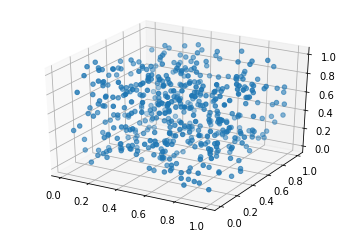

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_u[:,0],data_u[:,1],data_u[:,2])
plt.show()

In [26]:
#Create base labels used for following comparasion
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data_u)
pred_base = kmeans.predict(data_u)
labels_base = kmeans.labels_

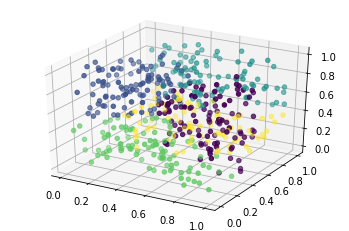

In [27]:
visualize_classification_3d(data_u, labels_base)

In [29]:
#Repeat times
N = 50

scores1 = []
scores2 = []

#for time 0, set score to 0
scores1.append(0)
scores2.append(0)

# for loop N times
for i in range(1,N):
    # kmeans score
    kmeans1 = KMeans(n_clusters=5, n_init=100, init='k-means++').fit(data_u)
    scores1.append(metrics.adjusted_rand_score(kmeans1.labels_, labels_base))
    #scores1.append(metrics.rand_score(kmeans1.labels_, labels_base))
    # random score
    kmeans2 = KMeans(n_clusters=5, n_init=100, init='random').fit(data_u)
    scores2.append(metrics.adjusted_rand_score(kmeans2.labels_, labels_base))
    #scores2.append(metrics.rand_score(kmeans2.labels_, labels_base))
    
# plot two lines
fig = go.Figure()    
fig.layout.xaxis.range = [0, N]
fig.layout.yaxis.range = [0, 1.1]  

fig.add_trace(go.Scatter(y=scores1, name='k-means++', mode='lines+markers'))
fig.add_trace(go.Scatter(y=scores2, name='random', mode='lines+markers'))

fig.update_layout(autosize=False, width=1000, height=500,
                  title="Adjusted Rand Score of K-Means cluster with different Initialization methords", 
                  xaxis_title="Repeat times", yaxis_title="Adjusted_rand_score",legend_title="Init_method:")                     

fig.show()

# print two average scores
print("Average k-means++ score: " + str(np.mean(scores1[1:])))
print("Average random score   : " + str(np.mean(scores2[1:])))

print("Variance of k-means++ score: " + str(np.var(scores1[1:])))
print("Variance of random score   : " + str(np.var(scores2[1:])))

Average k-means++ score: 0.7898615502092178
Average random score   : 0.7563869927501348
Variance of k-means++ score: 0.010362471599106655
Variance of random score   : 0.01815162707068135


### Question 5: 
Apply discriminant analysis to this data and again apply K-means with
n_clusters = 11 to the projected data in the discriminant space. What do you notice?
Explain. Visualize the results.

###Instructions to load file from google drive:

- add new folder "Colab_Notebooks" to "My Drive" in google drive
- upload "texture.dat" to "Colab_Notebooks" folder
- run drive mount function below

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# |= load data from text file, each row of the data must have the same number of values

file = 'drive/My Drive/Colab Notebooks/texture.dat'
textures = np.loadtxt(file)
np.random.shuffle(textures)

In [36]:
X = textures[:,:40]
y = textures[:,40]

In [37]:
kmeans = KMeans(n_clusters = 11).fit(X)
metrics.adjusted_rand_score(kmeans.labels_, y)

0.46671192916789384

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

In [39]:
print(X.shape)

(5500, 40)


In [40]:
X_lda = LDA.fit(X, y).transform(X)

In [41]:
print(X_lda.shape)

(5500, 10)


In [42]:
kmeans = KMeans(n_clusters = 11).fit(X_lda)
metrics.adjusted_rand_score(kmeans.labels_, y)

0.9900757931495917

In [43]:
scores = []

scores.append(0)

for i in range(1, 11):
  LDA = LinearDiscriminantAnalysis(n_components=i)
  X_lda = LDA.fit(X, y).transform(X)
  kmeans = KMeans(n_clusters = 11).fit(X_lda)
  scores.append(metrics.adjusted_rand_score(kmeans.labels_, y))


In [44]:
scores

[0,
 0.32277811973000925,
 0.6564212402922881,
 0.7546866910956521,
 0.8370065726405241,
 0.8933120996116366,
 0.8951194542316194,
 0.9687846932523916,
 0.9803209973999315,
 0.9861520323818694,
 0.9900757931495917]

In [46]:
import plotly.graph_objects as go

fig = go.Figure()    
fig.layout.xaxis.range = [1, 11]
fig.layout.yaxis.range = [0, 1.1]  

fig.add_trace(go.Scatter(y=scores))

fig.update_layout(autosize=False, width=1000, height=500,title="Discriminant Analysis of K-Means cluster with different Number of Dimensions", xaxis_title="n_components", yaxis_title="Adjusted_rand_score")                     

fig.show()

In [47]:
#Reduce X to 2 dimensions
LDA = LinearDiscriminantAnalysis(n_components=2)
X_lda = LDA.fit(X, y).transform(X)
kmeans = KMeans(n_clusters = 11).fit(X_lda)
metrics.adjusted_rand_score(kmeans.labels_, y)

0.6573981124317363

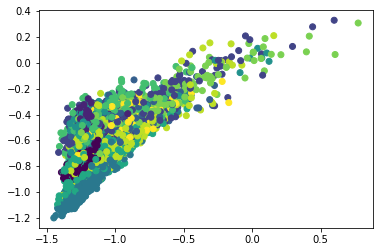

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

In [49]:
#Reduce X to 3 dimensions
LDA = LinearDiscriminantAnalysis(n_components=3)
X_lda = LDA.fit(X, y).transform(X)
kmeans = KMeans(n_clusters = 11).fit(X_lda)
metrics.adjusted_rand_score(kmeans.labels_, y)

0.7549637008574687

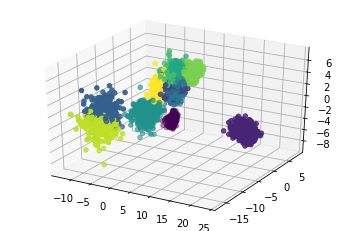

In [50]:
visualize_classification_3d(X_lda, kmeans.labels_)